In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
train_value = pd.read_csv('train_values.csv')
train_label = pd.read_csv('train_labels.csv')


In [179]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 41 columns):
building_id                               10000 non-null int64
geo_level_1_id                            10000 non-null int64
geo_level_2_id                            10000 non-null int64
geo_level_3_id                            10000 non-null int64
count_floors_pre_eq                       10000 non-null int64
age                                       10000 non-null int64
area                                      10000 non-null int64
height                                    10000 non-null int64
land_surface_condition                    10000 non-null object
foundation_type                           10000 non-null int64
roof_type                                 10000 non-null object
ground_floor_type                         10000 non-null object
other_floor_type                          10000 non-null object
position                                  10000 non-null object
plan_

In [214]:

#result.describe()
train_value['height_per_floor']= train_value['height'] / train_value['count_floors_pre_eq']


train_value['plan_configuration'] = train_value['plan_configuration'].map({'6e81': 1,
                                       '3fee': 2, '1442': 3, '8e3f': 4, 'd2d9': 5,
                                       '84cf': 6, 'a779': 7, '0448': 8, 'cb88': 9})


train_value['age_height_ratio']= train_value['age'] / train_value['height']
result = pd.merge(train_value, train_label)

X = result[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
                 'count_floors_pre_eq', 'age', 'area', 'height',
                 'land_surface_condition','foundation_type',
                 'roof_type',
                 'ground_floor_type',
                 'plan_configuration',
                 'height_per_floor',
                 'age_height_ratio',
                 'damage_grade'
                 ]]
X=X.as_matrix()
from sklearn.preprocessing import LabelEncoder
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])
labelencoder_X_8 = LabelEncoder()
X[:, 8] = labelencoder_X_8.fit_transform(X[:, 8])
labelencoder_X_9 = LabelEncoder()
X[:, 9] = labelencoder_X_9.fit_transform(X[:, 9])
labelencoder_X_10 = LabelEncoder()
X[:, 10] = labelencoder_X_10.fit_transform(X[:, 10])
X=pd.DataFrame(X)
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


ValueError: zero-size array to reduction operation minimum which has no identity

In [69]:
%matplotlib inline
# land = result['land_surface_condition']
# damage_grade = result['damage_grade']
# plt.bar(land, damage_grade)
# plot.xlabel("land")
# plt.ylabel("damage_grade")
# plt.plot()
# plt.show()
# CountHeightByDamageGrade = result['damage_grade'].groupby(result['land_surface_condition'])
# CountHeightByDamageGrade.count()

In [153]:

# FacetGrid = sns.FacetGrid(result, row='land_surface_condition', size=4.5, aspect=1.6)
# FacetGrid.map(sns.pointplot, 'position', 'damage_grade', 'land_surface_condition', palette=None,  order=None, hue_order=None )
# FacetGrid.add_legend()

In [204]:
result[['land_surface_condition', 'damage_grade']].groupby(['land_surface_condition','damage_grade']).size()

land_surface_condition  damage_grade
2f15                    1                 35
                        2                191
                        3                121
808e                    1                102
                        2                821
                        3                419
d502                    1                801
                        2               4624
                        3               2886
dtype: int64

In [130]:
result['foundation_type'] = result['foundation_type'].map({'467b': 1, '858b': 2, '6c3e': 3, 'bb5f': 4, '337f': 5})
  

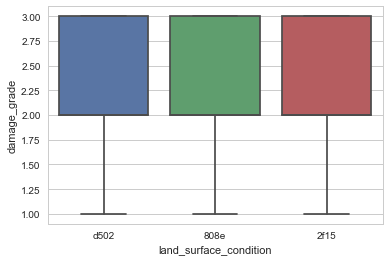

In [93]:
import seaborn as sns
# sns.set(style="whitegrid",color_codes=True)
# land = result['land_surface_condition']
# damage_grade = result['damage_grade']
# sns.stripplot(x="land", y="damage_grade", data=result)
sns.boxplot(x='land_surface_condition', y='damage_grade', data=result)

In [112]:
result = result.as_matrix()
labelencoder_result_7 = LabelEncoder()
result[:, 7] = labelencoder_result_7.fit_transform(result[:, 7])
labelencoder_result_8 = LabelEncoder()
result[:, 8] = labelencoder_result_8.fit_transform(result[:, 8])
labelencoder_result_9 = LabelEncoder()
result[:, 9] = labelencoder_result_8.fit_transform(result[:, 9])
labelencoder_result_10 = LabelEncoder()
result[:, 10] = labelencoder_result_10.fit_transform(result[:, 10])
labelencoder_result_11 = LabelEncoder()
result[:, 11] = labelencoder_result_7.fit_transform(result[:, 11])
labelencoder_result_12 = LabelEncoder()
result[:, 12] = labelencoder_result_7.fit_transform(result[:, 12])
labelencoder_X_13 = LabelEncoder()
result[:, 13] = labelencoder_result_7.fit_transform(result[:, 13])

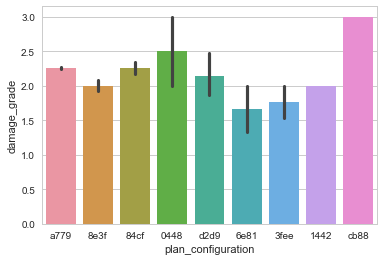

In [119]:
sns.barplot(x='plan_configuration', y='damage_grade', data=result)

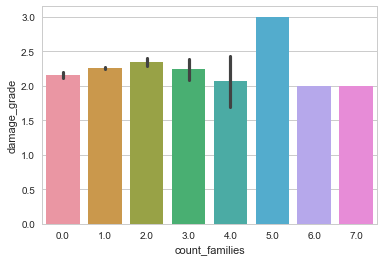

In [128]:
sns.barplot(x='count_families', y='damage_grade', data=result)

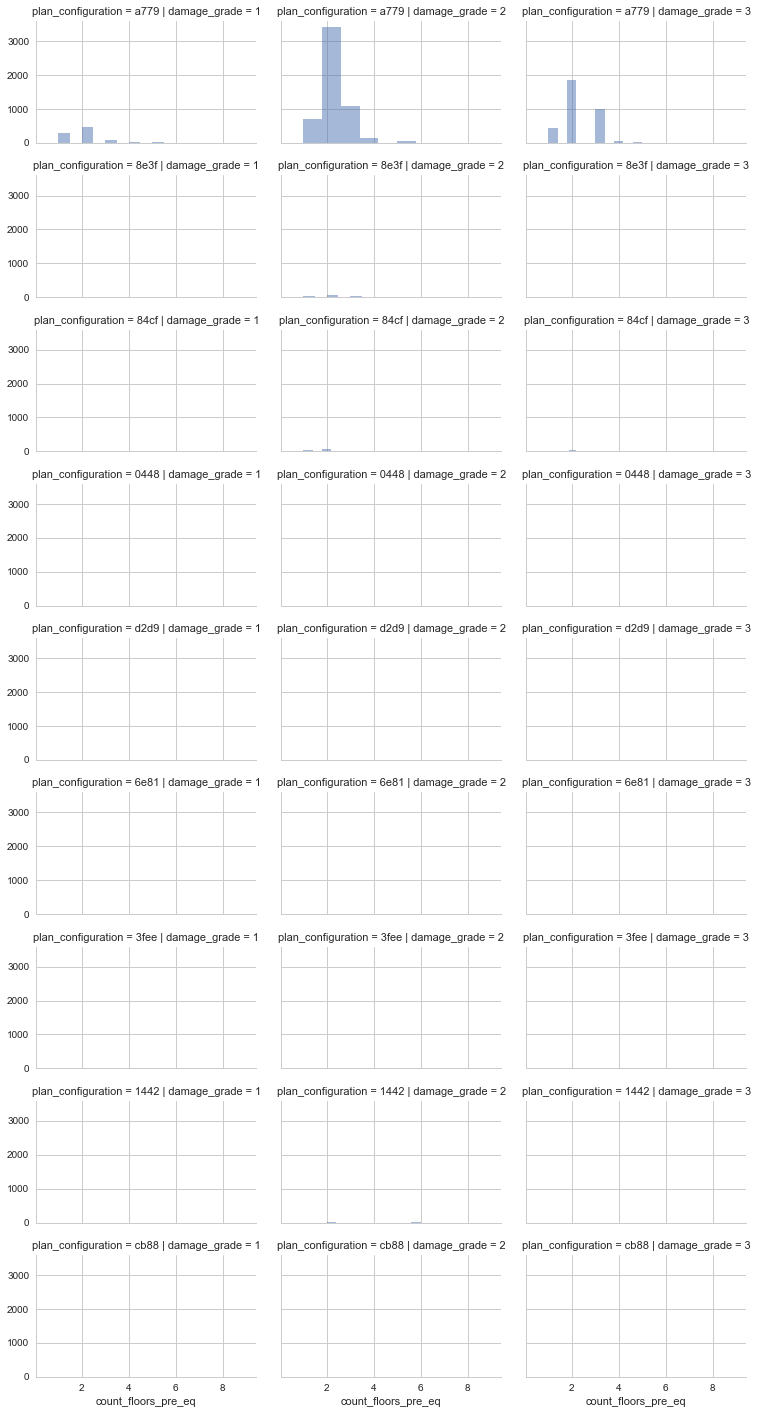

In [117]:
grid = sns.FacetGrid(result, col='damage_grade', row='plan_configuration', size=2.2, aspect=1.6)
grid.map(plt.hist, 'count_floors_pre_eq', alpha=.5, bins=10)
grid.add_legend();

In [135]:
for dataset in result:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 15, 'age'] = 0
    dataset.loc[(dataset['age'] > 10) & (dataset['age'] <= 20), 'age'] = 1
    dataset.loc[(dataset['age'] > 20) & (dataset['age'] <= 30), 'age'] = 2
    dataset.loc[(dataset['age'] > 30) & (dataset['age'] <= 40), 'age'] = 3
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 50), 'age'] = 4
    dataset.loc[(dataset['age'] > 50) & (dataset['age'] <= 60), 'age'] = 5
    dataset.loc[(dataset['age'] > 60) & (dataset['age'] <= 70), 'age'] = 6
    dataset.loc[(dataset['age'] > 70), 'age'] = 7

TypeError: string indices must be integers, not str

In [171]:

X = train_value.iloc[:,1:30].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])
labelencoder_X_8 = LabelEncoder()
X[:, 8] = labelencoder_X_8.fit_transform(X[:, 8])
labelencoder_X_9 = LabelEncoder()
X[:, 9] = labelencoder_X_9.fit_transform(X[:, 9])
labelencoder_X_10 = LabelEncoder()
X[:, 10] = labelencoder_X_10.fit_transform(X[:, 10])
labelencoder_X_11 = LabelEncoder()
X[:, 11] = labelencoder_X_11.fit_transform(X[:, 11])
labelencoder_X_12 = LabelEncoder()
X[:, 12] = labelencoder_X_12.fit_transform(X[:, 12])
labelencoder_X_13 = LabelEncoder()
X[:, 13] = labelencoder_X_13.fit_transform(X[:, 13])
labelencoder_X_25 = LabelEncoder()
X[:, 25] = labelencoder_X_25.fit_transform(X[:, 25])

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

In [177]:
result['height_per_floor']= result['height'] / result['count_floors_pre_eq']

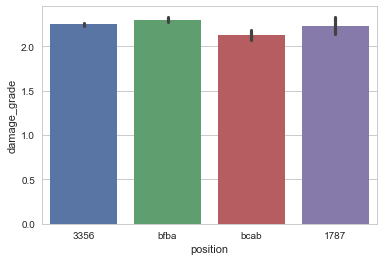

In [206]:
#result['position'].unique()
sns.barplot(x='position', y='damage_grade', data=result)

In [8]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

y_pred_svc = clf.predict(X_test)
from sklearn.metrics import f1_score
F1_SVC = f1_score(y_test, y_pred_svc, average='micro')

In [134]:
result['age'].mean()

25.3935

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini',
                             max_depth=None,                 
                             min_samples_leaf=20,
                              min_samples_split=15,
                             n_estimators=1500,
                             oob_score=True,
                             random_state=0, warm_start=True)
clf_train = clf.fit(X_train, y_train)
y_pred_randomForest = clf_train.predict(X_test)
from sklearn.metrics import f1_score
F1_randomForest = f1_score(y_test, y_pred_randomForest, average='micro')


In [12]:
F1_randomForest

0.63933333333333331

In [178]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 41 columns):
building_id                               10000 non-null int64
geo_level_1_id                            10000 non-null int64
geo_level_2_id                            10000 non-null int64
geo_level_3_id                            10000 non-null int64
count_floors_pre_eq                       10000 non-null int64
age                                       10000 non-null int64
area                                      10000 non-null int64
height                                    10000 non-null int64
land_surface_condition                    10000 non-null object
foundation_type                           10000 non-null int64
roof_type                                 10000 non-null object
ground_floor_type                         10000 non-null object
other_floor_type                          10000 non-null object
position                                  10000 non-null object
plan_

In [41]:
total = train_value.isnull().sum().sort_values(ascending=False)
percent_1 = train_value.isnull().sum()/train_value.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


In [43]:
total = train_value.isnull().sum().sort_values(ascending=False)
sum(total)

0